# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mousenstudy_combined=pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousenstudy_combined

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.
mouse_count=pd.unique(mousenstudy_combined["Mouse ID"])
mouse_count
total_no_of_mouse=len(mouse_count)
total_no_of_mouse

249

In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_ID = mousenstudy_combined.loc[mousenstudy_combined.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = mousenstudy_combined.loc[mousenstudy_combined["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousenstudy_clean= mousenstudy_combined.drop(index=(dup_mice_df.index))
mousenstudy_clean=mousenstudy_clean.reset_index()
mousenstudy_clean


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
mice_count = pd.unique(mousenstudy_clean["Mouse ID"])
mice_count
mice_count_no=len(mice_count)
mice_count_no


248

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = mousenstudy_clean['Tumor Volume (mm3)'].groupby(mousenstudy_clean['Drug Regimen']).mean()
median = mousenstudy_clean['Tumor Volume (mm3)'].groupby(mousenstudy_clean['Drug Regimen']).median()
variance = mousenstudy_clean['Tumor Volume (mm3)'].groupby(mousenstudy_clean['Drug Regimen']).var()
std_dev= mousenstudy_clean['Tumor Volume (mm3)'].groupby(mousenstudy_clean['Drug Regimen']).std()
sem = mousenstudy_clean['Tumor Volume (mm3)'].groupby(mousenstudy_clean['Drug Regimen']).sem()

summary_stat_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std_dev, 
                           "Tumor Volume Std. Err.":sem})
summary_stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg =  mousenstudy_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

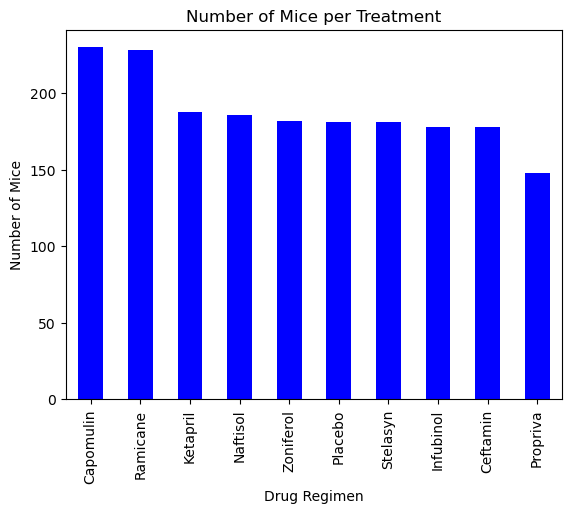

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_all = mousenstudy_clean["Drug Regimen"].value_counts()

# Create a Pandas bar plot based off of the group series from before and label the title
plot_pandas = mice_count_all.plot.bar(color='b')  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

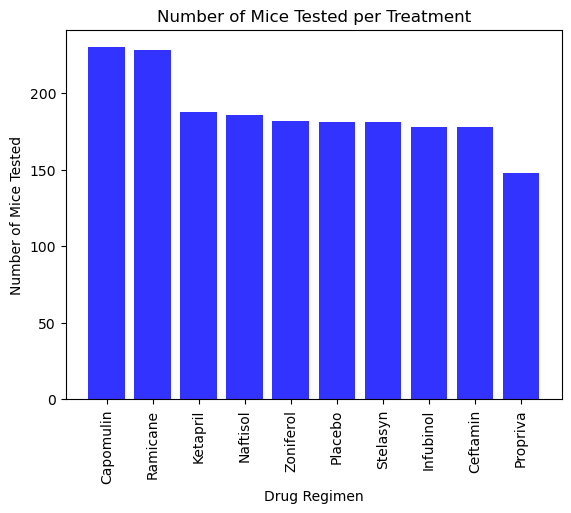

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_count_all.index.values
y_axis = mice_count_all.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)

plt.show()

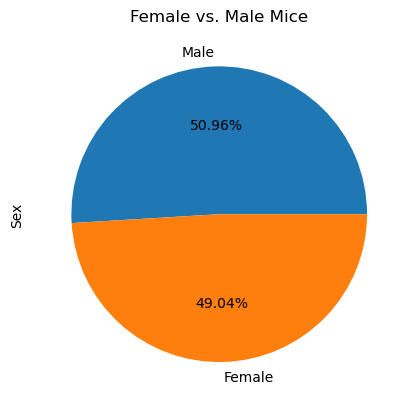

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = mousenstudy_clean["Sex"].value_counts()
gender_data
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.2f%%")
plt.show()



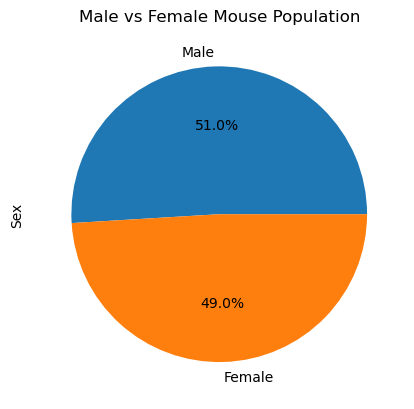

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
labels = ['Female', 'Male']

plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Capomulin
capomulin_df = mousenstudy_clean.loc[mousenstudy_clean["Drug Regimen"] == "Capomulin",:]
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(Capomulin_last)
capomulin_combined = pd.merge(Capomulin_vol, mousenstudy_clean, how="left", on=("Mouse ID","Timepoint"))
capomulin_combined.head()


,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,309,Capomulin,Female,9,22,38.982878,2
1,b742,45,299,Capomulin,Male,7,21,38.939633,0
2,f966,20,64,Capomulin,Male,16,17,30.485985,0
3,g288,45,244,Capomulin,Male,3,19,37.074024,1
4,g316,45,360,Capomulin,Female,22,22,40.159220,2


In [88]:
# Start by getting the last (greatest) timepoint for each mouse
# Ramicane
ramicane_df = mousenstudy_clean.loc[mousenstudy_clean["Drug Regimen"] == "Ramicane",:]
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_combined = pd.merge(ramicane_vol, mousenstudy_clean, how="left", on=("Mouse ID","Timepoint"))
ramicane_combined.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,327,Ramicane,Male,3,22,38.407618,1
1,a444,45,430,Ramicane,Female,10,25,43.047543,0
2,a520,45,214,Ramicane,Male,13,21,38.810366,1
3,a644,45,174,Ramicane,Female,7,17,32.978522,1
4,c458,30,289,Ramicane,Female,23,20,38.342008,2


In [83]:
# Infubinol
infubinol_df = mousenstudy_clean.loc[mousenstudy_clean["Drug Regimen"] == "Infubinol",:]
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_combined = pd.merge(infubinol_vol, mousenstudy_clean, how="left", on=("Mouse ID","Timepoint"))
infubinol_combined.head()

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,463,Infubinol,Female,20,23,67.973419,2
1,a251,45,473,Infubinol,Female,21,25,65.525743,1
2,a577,30,530,Infubinol,Female,6,25,57.031862,2
3,a685,45,540,Infubinol,Male,8,30,66.083066,3
4,c139,45,637,Infubinol,Male,11,28,72.226731,2


In [80]:
# Ceftamin
ceftamin_df = mousenstudy_clean.loc[mousenstudy_clean["Drug Regimen"] == "Ceftamin",:]
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_combined = pd.merge(ceftamin_vol, mousenstudy_clean, how="left", on=("Mouse ID","Timepoint"))
ceftamin_combined.head()

,Mouse ID,Timepoint,index,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,493,Ceftamin,Female,20,28,62.999356,3
1,b447,0,594,Ceftamin,Male,2,30,45.000000,0
2,b487,25,600,Ceftamin,Female,6,28,56.057749,1
3,b759,30,617,Ceftamin,Female,12,25,55.742829,1
4,f436,15,840,Ceftamin,Female,3,25,48.722078,2


In [85]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_tumors = capomulin_combined["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
#Ramicane
ramicane_tumors = ramicane_combined["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ramicane tumors: {lowerq}")
print(f"The upper quartile of ramicane tumors: {upperq}")
print(f"The interquartile range of ramicane tumors: {iqr}")
print(f"The median of ramicane tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ramicane tumors: 31.56046955
The upper quartile of ramicane tumors: 40.65900627
The interquartile range of ramicane tumors: 9.098536719999998
The median of ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
#Ramicane
infubinol_tumors = infubinol_combined["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of infubinol tumors: {lowerq}")
print(f"The upper quartile of infubinol tumors: {upperq}")
print(f"The interquartile range of infubinol tumors: {iqr}")
print(f"The median of infubinol tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of infubinol tumors: 54.04860769
The upper quartile of infubinol tumors: 65.52574285
The interquartile range of infubinol tumors: 11.477135160000003
The median of infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [93]:
# Put treatments into a list for for loop (and later for plot labels)
#Ceftamin
ceftamin_tumors = ceftamin_combined["Tumor Volume (mm3)"]


# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles =ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of ceftamin tumors: {lowerq}")
print(f"The upper quartile of ceftamin tumors: {upperq}")
print(f"The interquartile range of ceftamin tumors: {iqr}")
print(f"The median of ceftamin tumors: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ceftamin tumors: 48.72207785
The upper quartile of ceftamin tumors: 64.29983003
The interquartile range of ceftamin tumors: 15.577752179999997
The median of ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


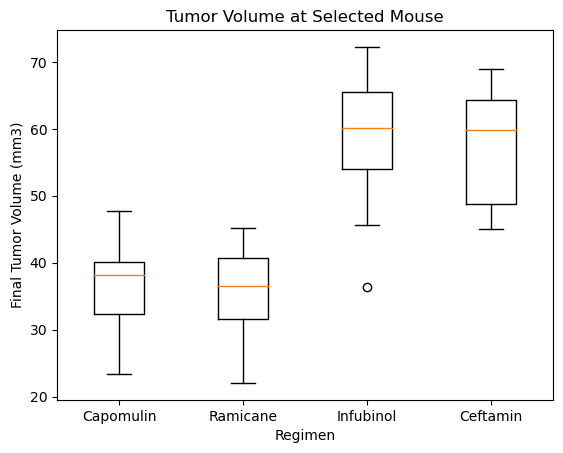

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

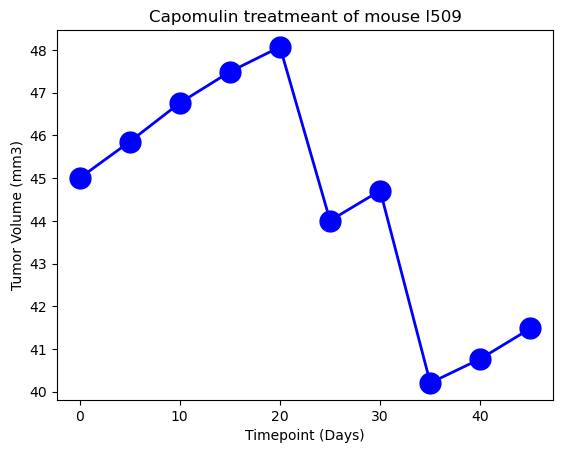

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
plot_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
plot_df.head()
x_axis = plot_df["Timepoint"]
tumsiz = plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

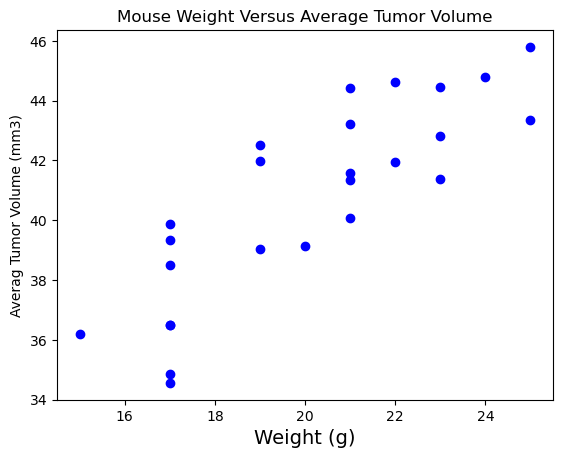

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')


## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


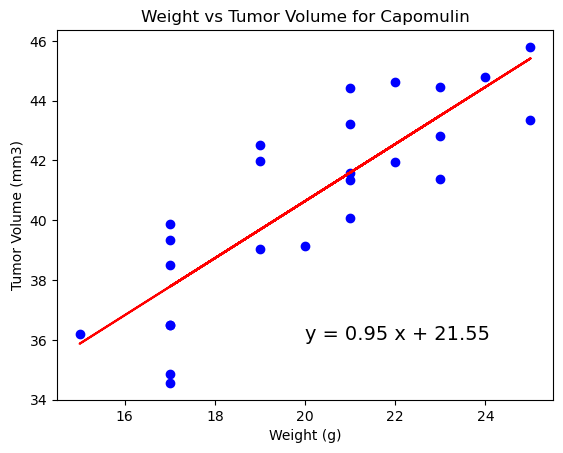

In [102]:
# linear regression equation and plotting

(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"],color='b')
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()